In [1]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df =pd.read_csv('auto.csv')

In [3]:
df

,PetalLength,SepalLength
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
5,6.0,5.1
6,5.4,4.5
7,6.0,4.5
8,6.7,4.7
9,6.3,4.4


Text(0, 0.5, 'SepalLength')

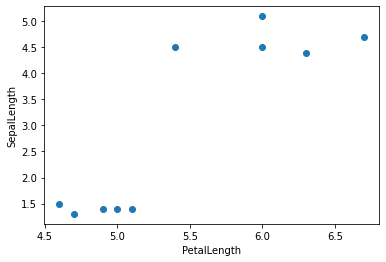

In [9]:
plt.scatter(df.PetalLength,df.SepalLength)
plt.xlabel('PetalLength')
plt.ylabel('SepalLength')

In [10]:
km = KMeans(n_clusters=2)
y_predicted=km.fit_predict(df[['PetalLength','SepalLength']])
y_predicted

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [12]:
df['cluster']=y_predicted
df

,PetalLength,SepalLength,cluster
0,5.1,1.4,1
1,4.9,1.4,1
2,4.7,1.3,1
3,4.6,1.5,1
4,5.0,1.4,1
5,6.0,5.1,0
6,5.4,4.5,0
7,6.0,4.5,0
8,6.7,4.7,0
9,6.3,4.4,0


In [13]:
 km.cluster_centers_

array([[6.08, 4.64],
       [4.86, 1.4 ]])

In [14]:
df1=df [df.cluster==0]
df2=df [df.cluster==1]

No handles with labels found to put in legend.


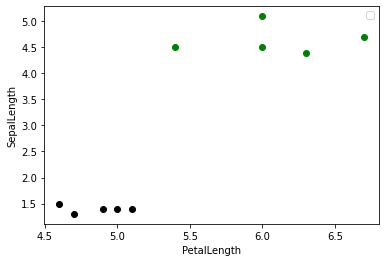

In [16]:
plt.scatter(df1.PetalLength,df1.SepalLength,color='green')
plt.scatter(df2.PetalLength,df2.SepalLength,color='black')
plt.xlabel('PetalLength')
plt.ylabel('SepalLength')

In [19]:
plt.scatter(df1.PetalLength,df1.SepalLength,color='green')
plt.scatter(df2.PetalLength,df2.SepalLength,color='black')
plt.xlabel('PetalLength')
plt.ylabel('SepalLength')

,PetalLength,SepalLength,cluster
0,0.238095,0.026316,1
1,0.142857,0.026316,1
2,0.047619,0.000000,1
3,0.000000,0.052632,1
4,0.190476,0.026316,1
5,0.666667,1.000000,0
6,0.380952,0.842105,0
7,0.666667,0.842105,0
8,1.000000,0.894737,0
9,0.809524,0.815789,0


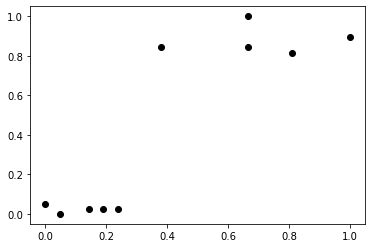

In [20]:
plt.scatter(df.PetalLength,df.SepalLength,color='black')


In [21]:
km = KMeans(n_clusters=2)
y_predicted=km.fit_predict(df[['PetalLength','SepalLength']])
y_predicted

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [22]:
df['cluster']=y_predicted
df

,PetalLength,SepalLength,cluster
0,0.238095,0.026316,0
1,0.142857,0.026316,0
2,0.047619,0.000000,0
3,0.000000,0.052632,0
4,0.190476,0.026316,0
5,0.666667,1.000000,1
6,0.380952,0.842105,1
7,0.666667,0.842105,1
8,1.000000,0.894737,1
9,0.809524,0.815789,1


In [23]:
 km.cluster_centers_

array([[0.12380952, 0.02631579],
       [0.7047619 , 0.87894737]])

In [24]:
df1=df [df.cluster==0]
df2=df [df.cluster==1]

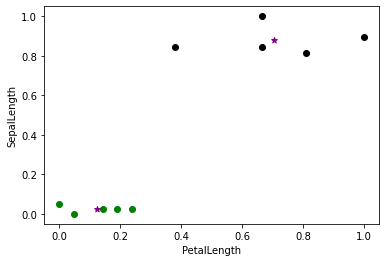

In [27]:
plt.scatter(df1.PetalLength,df1.SepalLength,color='green')
plt.scatter(df2.PetalLength,df2.SepalLength,color='black')
plt.xlabel('PetalLength')
plt.ylabel('SepalLength')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroids')
       

In [29]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['PetalLength','SepalLength']])
    sse.append(km.inertia_)

C:\Users\IBTISAM AHMED\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [30]:
sse

[2.9291053448156736,
 0.26788964893436584,
 0.1326865095068497,
 0.07384501353634697,
 0.04051168020301367,
 0.017604317812073972,
 0.007053975791609287,
 0.003652615247391646,
 0.0011337868480725331]

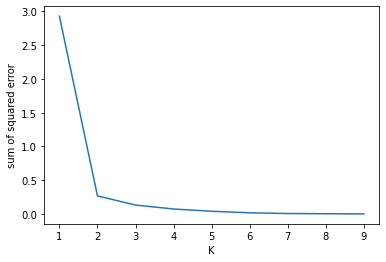

In [31]:
plt.xlabel('K')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)